**House Price Prediction and Regional Market Segmentation**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Read the dataset
file_path = '/content/drive/MyDrive/AmesHousing.csv'
df = pd.read_csv(file_path)

In [ ]:
# Step 3: Display basic information
print("Dataset shape:", df.shape)
print("\nFirst 5 rows of the dataset:")

Dataset shape: (2930, 82)

First 5 rows of the dataset:


In [ ]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

**Handling Missing Values**

In [ ]:
# Step 4: Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum().sort_values(ascending=False).head(10))


Missing values per column:
Pool QC          2917
Misc Feature     2824
Alley            2732
Fence            2358
Mas Vnr Type     1775
Fireplace Qu     1422
Lot Frontage      490
Garage Qual       159
Garage Yr Blt     159
Garage Cond       159
dtype: int64


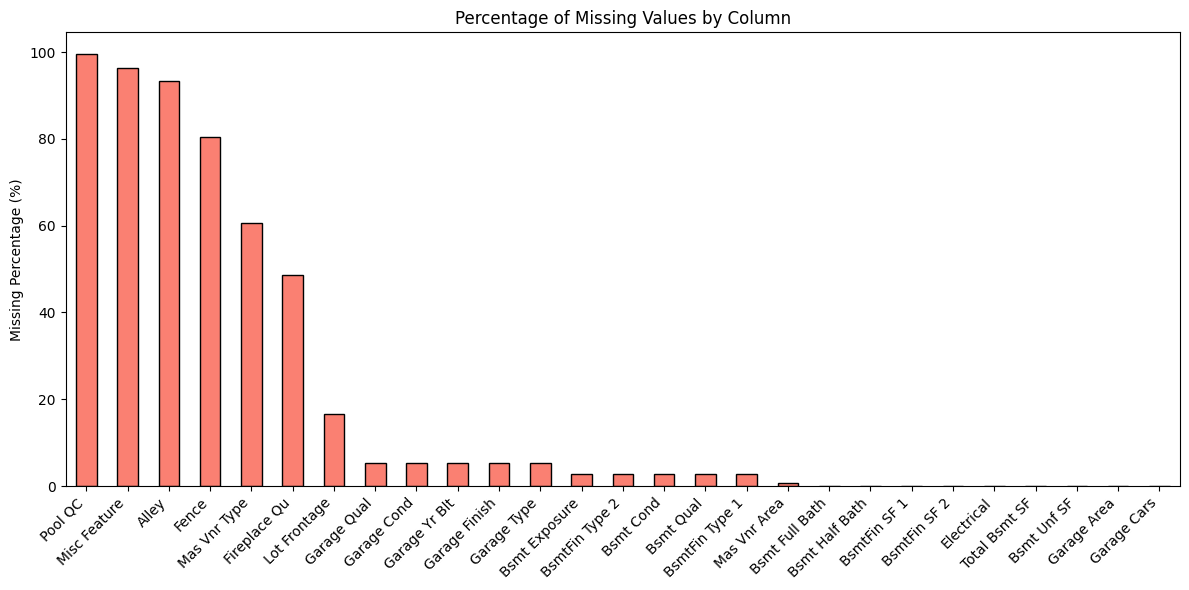

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0]  # Keep only columns with missing values
missing_percentage = missing_percentage.sort_values(ascending=False)

# Plot the missing value percentages
plt.figure(figsize=(12, 6))
missing_percentage.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Missing Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Convert year-based features into age**

In [ ]:
# Calculate age features from df_cleaned
df['HouseAge'] = df['Yr Sold'] - df['Year Built']
df['YearsSinceRemodel'] = df['Yr Sold'] - df['Year Remod/Add']
df['GarageAge'] = df['Yr Sold'] - df['Garage Yr Blt']

# Drop the original year-based columns (optional)
#df_cleaned.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], axis=1, inplace=True)



In [ ]:
# Drop columns with more than 40% missing values
threshold = 0.4  # Drop columns missing more than 40% of their values
missing_ratio = df.isnull().mean()
columns_to_drop = missing_ratio[missing_ratio > threshold].index
df_cleaned = df.drop(columns=columns_to_drop)

print(f"Dropped columns: {list(columns_to_drop)}")
print("New shape after dropping sparse columns:", df_cleaned.shape)

Dropped columns: ['Alley', 'Mas Vnr Type', 'Fireplace Qu', 'Pool QC', 'Fence', 'Misc Feature']
New shape after dropping sparse columns: (2930, 79)


In [ ]:
# : Drop irrelevant columns (e.g., Order, PID)
df_cleaned = df_cleaned.drop(columns=['Order', 'PID'])

In [ ]:
df_cleaned.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Garage Q

In [ ]:
# Step 3: Fill remaining missing values
# Numerical columns: fill with median
num_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[num_cols] = df_cleaned[num_cols].fillna(df_cleaned[num_cols].median())

In [ ]:
# Categorical columns: fill with mode
cat_cols = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[cat_cols] = df_cleaned[cat_cols].fillna(df_cleaned[cat_cols].mode().iloc[0])

In [ ]:
#  Confirm all missing values are handled
print("\nRemaining missing values:", df_cleaned.isnull().sum().sum())


Remaining missing values: 0


**Encode categorical variables (Label or One-Hot)**


In [ ]:
# Identify categorical columns
cat_cols = df_cleaned.select_dtypes(include='object').columns.tolist()
print(f"Number of categorical columns: {len(cat_cols)}")
print("Sample categorical columns:", cat_cols[:5])

Number of categorical columns: 37
Sample categorical columns: ['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities']


Define Ordinal Columns and Their Order

In [ ]:
# Define ordinal mappings
ordinal_mappings = {
    'Exter Qual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Exter Cond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Bsmt Qual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Bsmt Cond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Heating QC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Kitchen Qual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Fireplace Qu': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Garage Qual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Garage Cond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Pool QC': ['NA', 'Fa', 'TA', 'Gd', 'Ex'],
    'Bsmt Exposure': ['NA', 'No', 'Mn', 'Av', 'Gd'],
    'BsmtFin Type 1': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'BsmtFin Type 2': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
    'Fence': ['NA', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']
}

Apply Label Encoding to Ordinal Columns

In [ ]:
# Define ordinal_cols from the ordinal_mappings dictionary
ordinal_cols = list(ordinal_mappings.keys())

# Filter only ordinal columns that exist in df_cleaned
existing_ordinal_cols = [col for col in ordinal_cols if col in df_cleaned.columns]

# Update ordinal encoder with only existing columns
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[ordinal_mappings[col] for col in existing_ordinal_cols])

# Apply encoding safely
df_cleaned[existing_ordinal_cols] = encoder.fit_transform(df_cleaned[existing_ordinal_cols])

print("Ordinal encoding complete for:", existing_ordinal_cols)


Ordinal encoding complete for: ['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Heating QC', 'Kitchen Qual', 'Garage Qual', 'Garage Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Functional']


Apply One-Hot Encoding to Remaining Categorical Columns


In [ ]:
# Identify remaining categorical columns
cat_cols = df_cleaned.select_dtypes(include='object').columns.tolist()
nominal_cols = [col for col in cat_cols if col not in ordinal_cols]

# Apply one-hot encoding to the nominal columns
df_encoded = pd.get_dummies(df_cleaned, columns=nominal_cols, drop_first=True)

print("Final encoded dataset shape:", df_encoded.shape)

Final encoded dataset shape: (2930, 207)


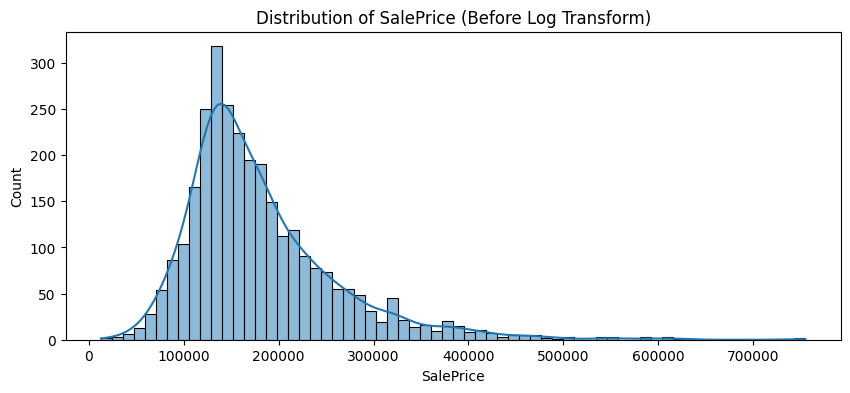

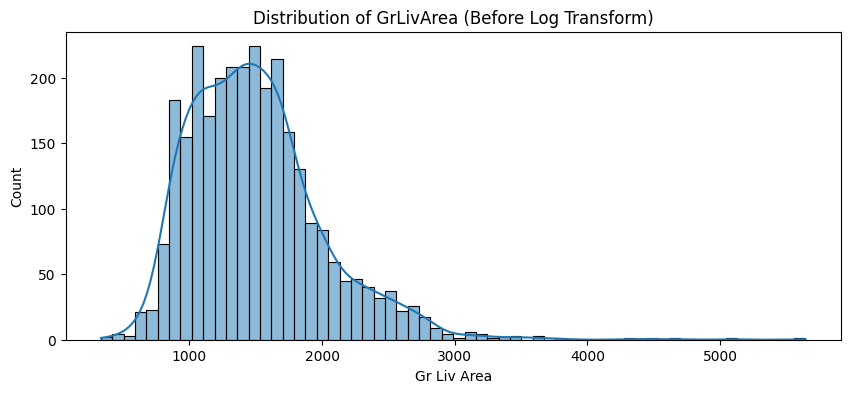

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of original SalePrice
plt.figure(figsize=(10, 4))
sns.histplot(df_cleaned['SalePrice'], kde=True)
plt.title("Distribution of SalePrice (Before Log Transform)")
plt.show()

# Histogram of GrLivArea
plt.figure(figsize=(10, 4))
sns.histplot(df_cleaned['Gr Liv Area'], kde=True)
plt.title("Distribution of GrLivArea (Before Log Transform)")
plt.show()


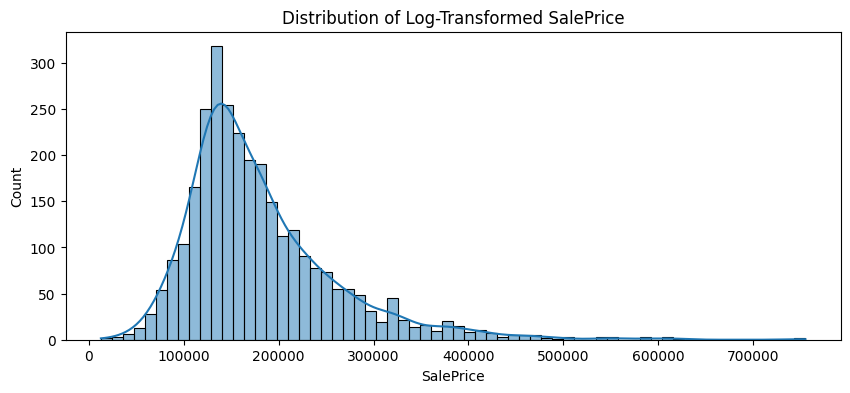

In [ ]:
# Plot transformed SalePrice
plt.figure(figsize=(10, 4))
sns.histplot(df_cleaned['SalePrice'], kde=True)
plt.title("Distribution of Log-Transformed SalePrice")
plt.show()

In [ ]:
import numpy as np

# Apply log transform
df_cleaned['SalePrice_Log'] = np.log1p(df_cleaned['SalePrice'])
df_cleaned['GrLivArea_Log'] = np.log1p(df_cleaned['Gr Liv Area'])

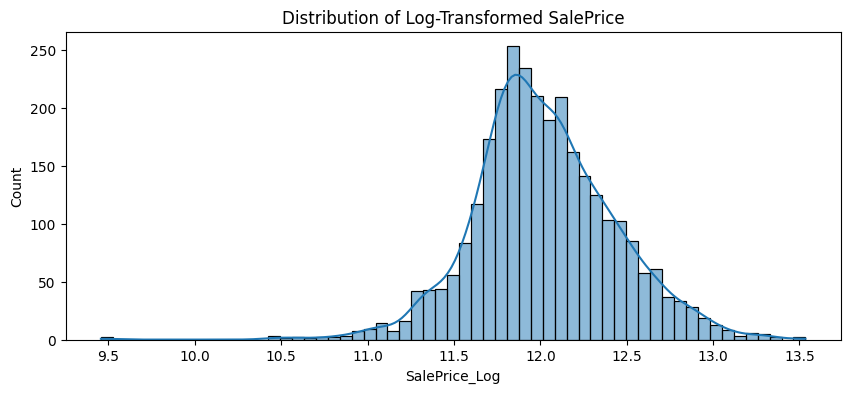

In [ ]:
# Plot transformed SalePrice
plt.figure(figsize=(10, 4))
sns.histplot(df_cleaned['SalePrice_Log'], kde=True)
plt.title("Distribution of Log-Transformed SalePrice")
plt.show()

In [ ]:
df_cleaned.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,HouseAge,YearsSinceRemodel,GarageAge,SalePrice_Log,GrLivArea_Log
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,5,2010,WD,Normal,215000,50,50,50.0,12.278398,7.412764
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,6,2010,WD,Normal,105000,49,49,49.0,11.561725,6.799056
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,6,2010,WD,Normal,172000,52,52,52.0,12.055256,7.192934
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,4,2010,WD,Normal,244000,42,42,42.0,12.404928,7.654917
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,3,2010,WD,Normal,189900,13,12,13.0,12.154258,7.396335


**Exploratory Data Analysis (EDA)**

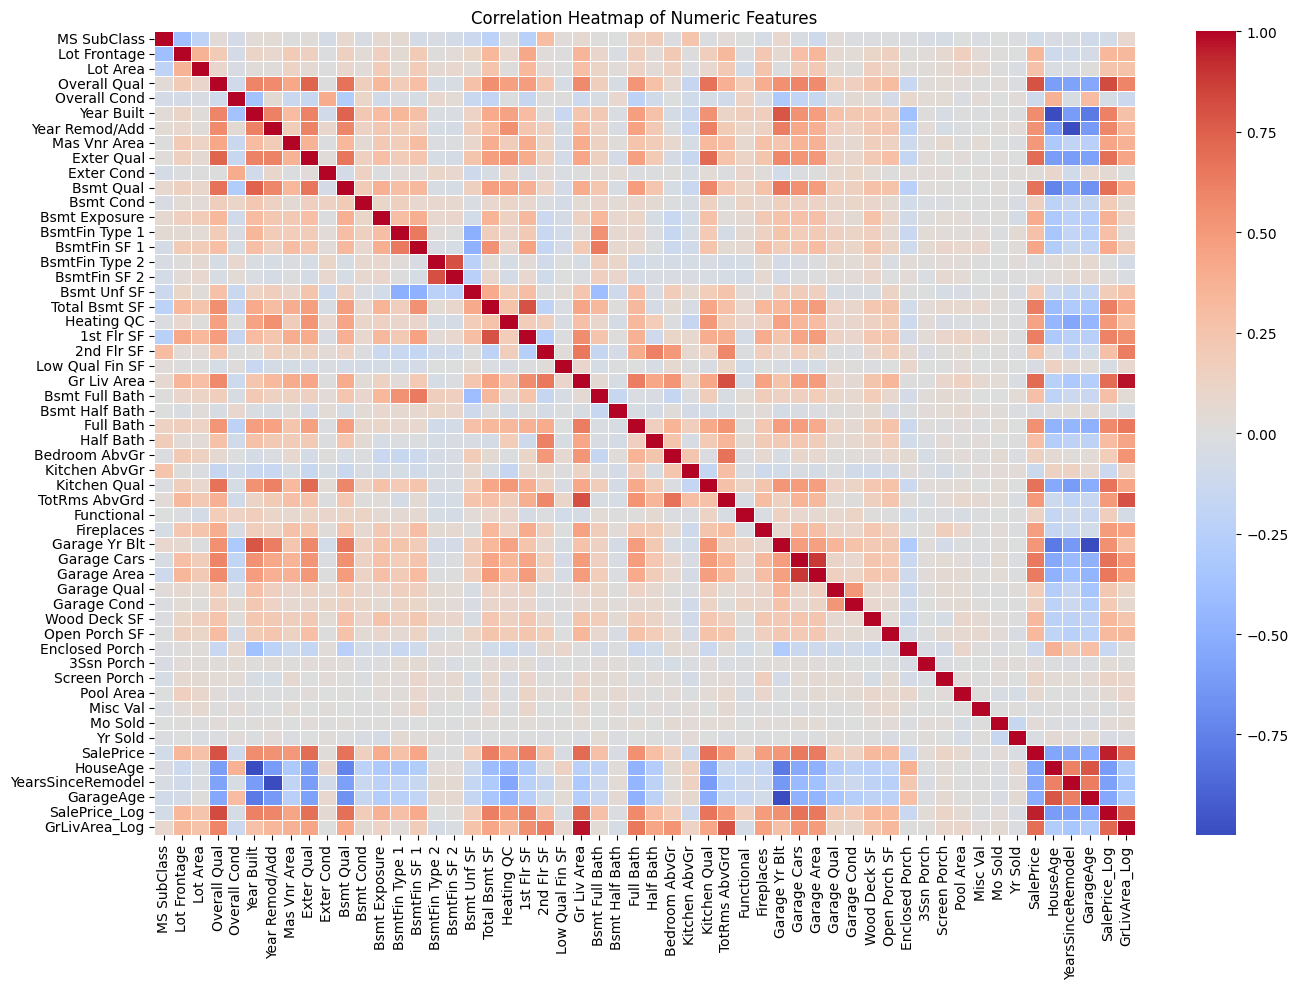

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix using only numeric features
corr_matrix = df_cleaned.select_dtypes(include=['float64', 'int64']).corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

In [ ]:
# Recompute correlation matrix
corr_matrix = df_cleaned.select_dtypes(include=['float64', 'int64']).corr()


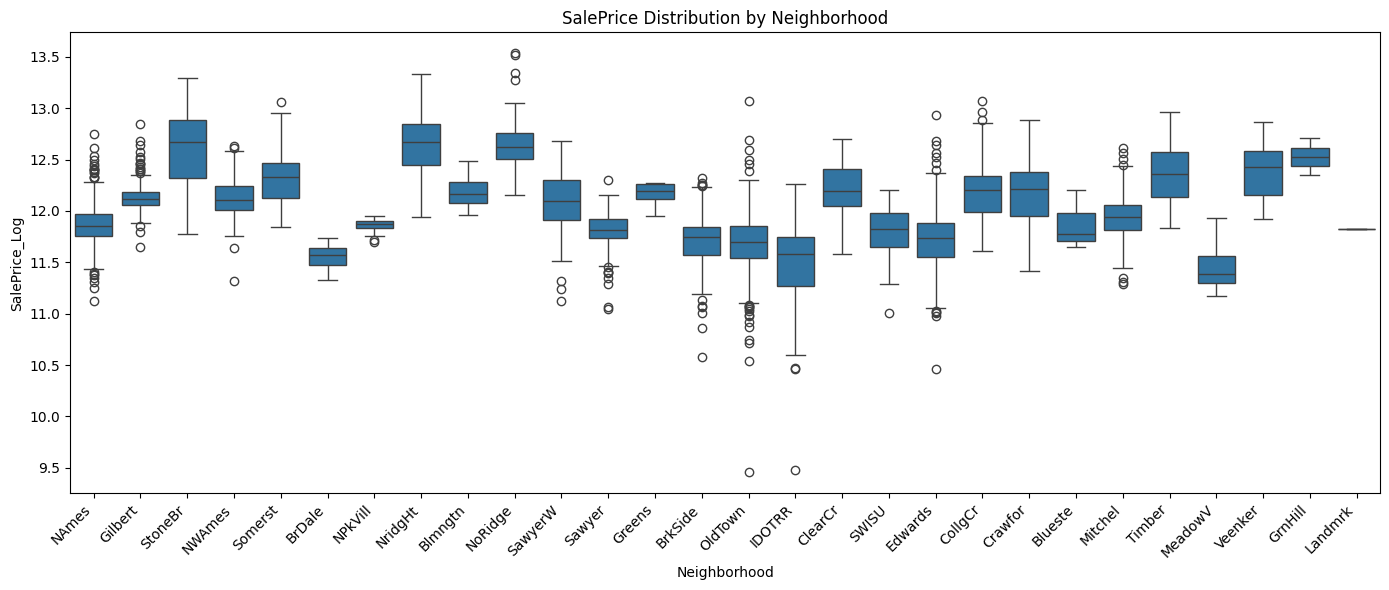

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_cleaned, x='Neighborhood', y='SalePrice_Log')
plt.xticks(rotation=45, ha='right')
plt.title('SalePrice Distribution by Neighborhood')
plt.tight_layout()
plt.show()

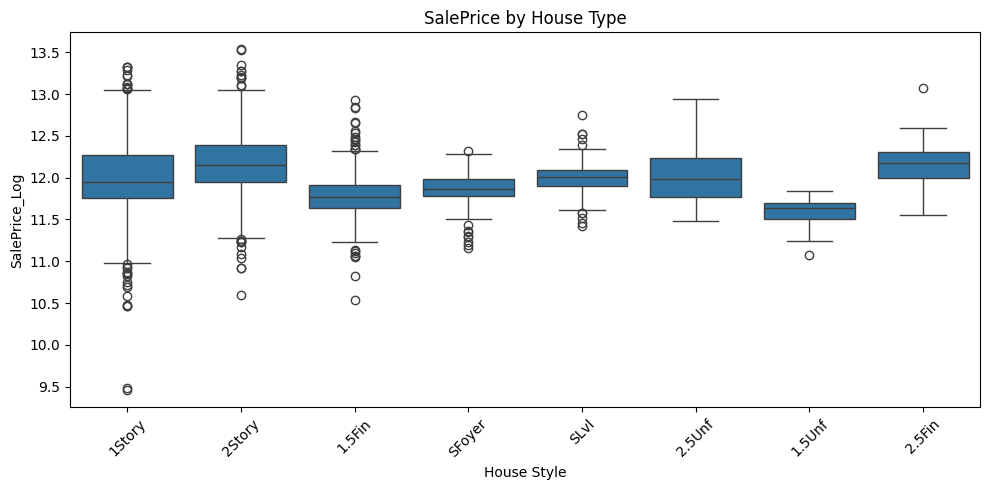

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_cleaned, x='House Style', y='SalePrice_Log')
plt.xticks(rotation=45)
plt.title('SalePrice by House Type')
plt.tight_layout()
plt.show()

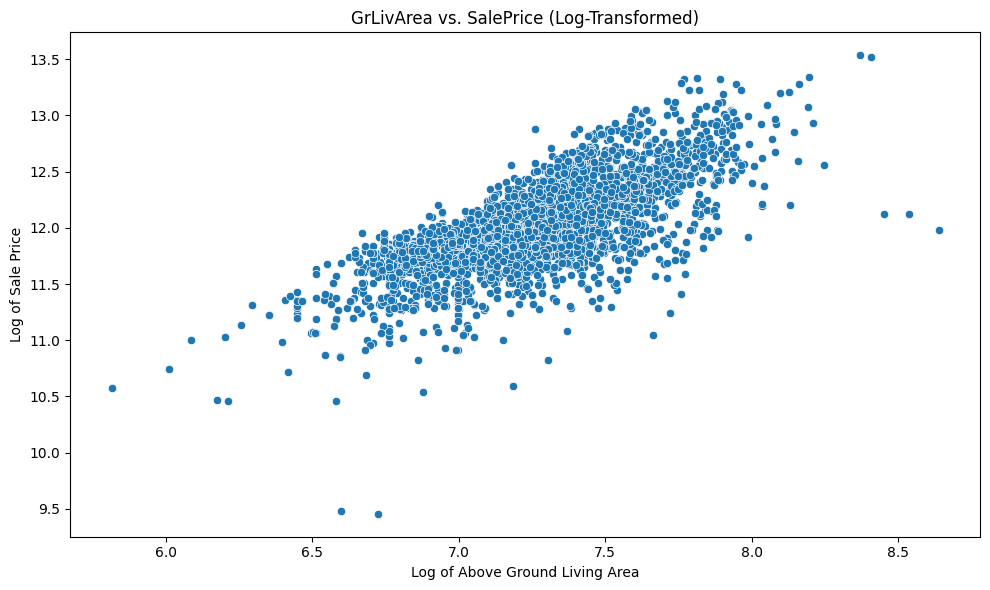

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='GrLivArea_Log', y='SalePrice_Log')
plt.title('GrLivArea vs. SalePrice (Log-Transformed)')
plt.xlabel('Log of Above Ground Living Area')
plt.ylabel('Log of Sale Price')
plt.tight_layout()
plt.show()

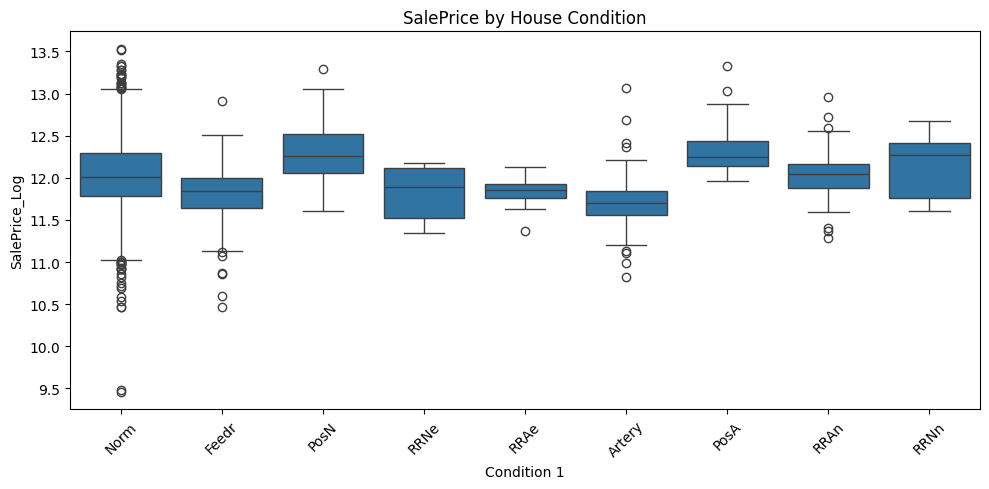

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_cleaned, x='Condition 1', y='SalePrice_Log')
plt.xticks(rotation=45)
plt.title('SalePrice by House Condition')
plt.tight_layout()
plt.show()

**SalePrice Distribution by House Type**

**Feature Engineering**

In [ ]:
# Add engineered features to the encoded dataset
df_encoded['TotalBathrooms'] = (
    df_cleaned['Full Bath'] +
    df_cleaned['Half Bath'] * 0.5 +
    df_cleaned['Bsmt Full Bath'] +
    df_cleaned['Bsmt Half Bath'] * 0.5
)

df_encoded['TotalSF'] = (
    df_cleaned['1st Flr SF'] +
    df_cleaned['2nd Flr SF'] +
    df_cleaned['Total Bsmt SF']
)

df_encoded['HouseAge'] = df_cleaned['Yr Sold'] - df_cleaned['Year Built']

In [ ]:
# Show missing values in df_encoded
missing_cols = df_encoded.columns[df_encoded.isnull().any()]
print("Columns with missing values:", missing_cols.tolist())
print(df_encoded[missing_cols].isnull().sum())

Columns with missing values: []
Series([], dtype: float64)


In [ ]:
df_encoded[missing_cols] = df_encoded[missing_cols].fillna(df_encoded[missing_cols].median())

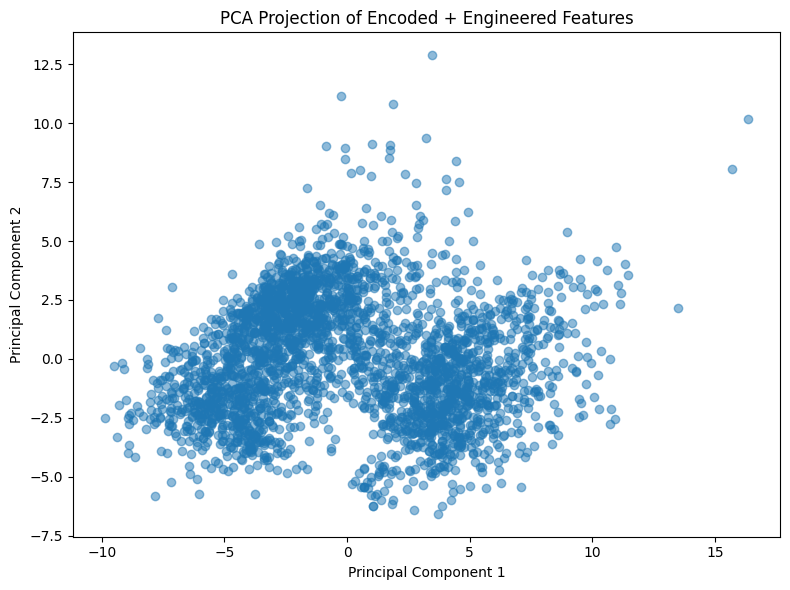

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Drop target before scaling
features_for_clustering = df_encoded.drop(columns=['SalePrice_Log'], errors='ignore')

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# PCA results as DataFrame
df_pca = pd.DataFrame(pca_components, columns=['PC1', 'PC2'], index=df_encoded.index)

# Visualize
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5)
plt.title("PCA Projection of Encoded + Engineered Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.tight_layout()
plt.show()


**Unsupervised Learning**

In [ ]:
df_pca

,PC1,PC2
0,-0.834979,5.731493
1,-3.719736,1.082341
2,-2.101856,4.130696
3,2.329191,4.594371
4,2.331845,-1.656011
...,...,...
2925,-1.625523,2.098277
2926,-1.589179,4.312520
2927,-1.886233,0.677108
2928,-0.202420,4.023222


**Clustering**

In [ ]:
from sklearn.cluster import KMeans

# Choose number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_pca)

# Add clusters back to df_pca
df_pca['Cluster'] = clusters

**Visualize the Clusters**

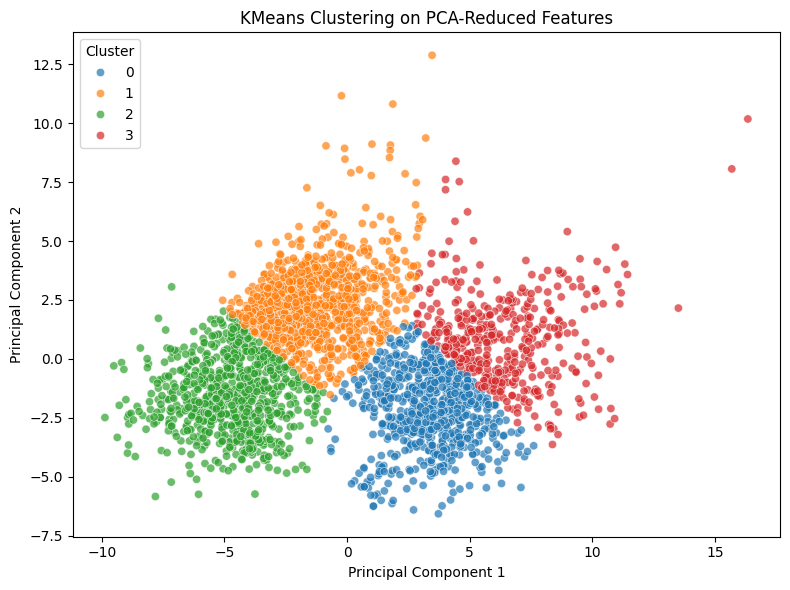

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='tab10', alpha=0.7)
plt.title("KMeans Clustering on PCA-Reduced Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

**Understand the Clusters**

In [ ]:
# Merge cluster labels with full data
df_clustered = df_encoded.copy()
df_clustered['Cluster'] = clusters

# Example: average features by cluster
cluster_summary = df_clustered.groupby('Cluster')[['TotalSF', 'TotalBathrooms', 'HouseAge']].mean()
print(cluster_summary)

             TotalSF  TotalBathrooms   HouseAge
Cluster                                        
0        2665.786611        2.624128   8.094840
1        2417.721680        2.079590  41.766602
2        1986.801040        1.549415  72.304291
3        3682.364286        3.085714   6.135714


In [ ]:
# Define custom labels for clusters
cluster_labels = {
    0: 'Modern Mid-Size Homes',
    1: 'Older Family Homes',
    2: 'Luxury New Builds',
    3: 'Historic Starter Homes'
}

# Map cluster labels
df_clustered['Cluster_Label'] = df_clustered['Cluster'].map(cluster_labels)

# View sample
print(df_clustered[['Cluster', 'Cluster_Label']].value_counts().sort_index())


Cluster  Cluster_Label         
0        Modern Mid-Size Homes      717
1        Older Family Homes        1024
2        Luxury New Builds          769
3        Historic Starter Homes     420
Name: count, dtype: int64


In [ ]:
# Align by index to avoid length mismatch
df_clustered['Neighborhood'] = df_cleaned['Neighborhood']


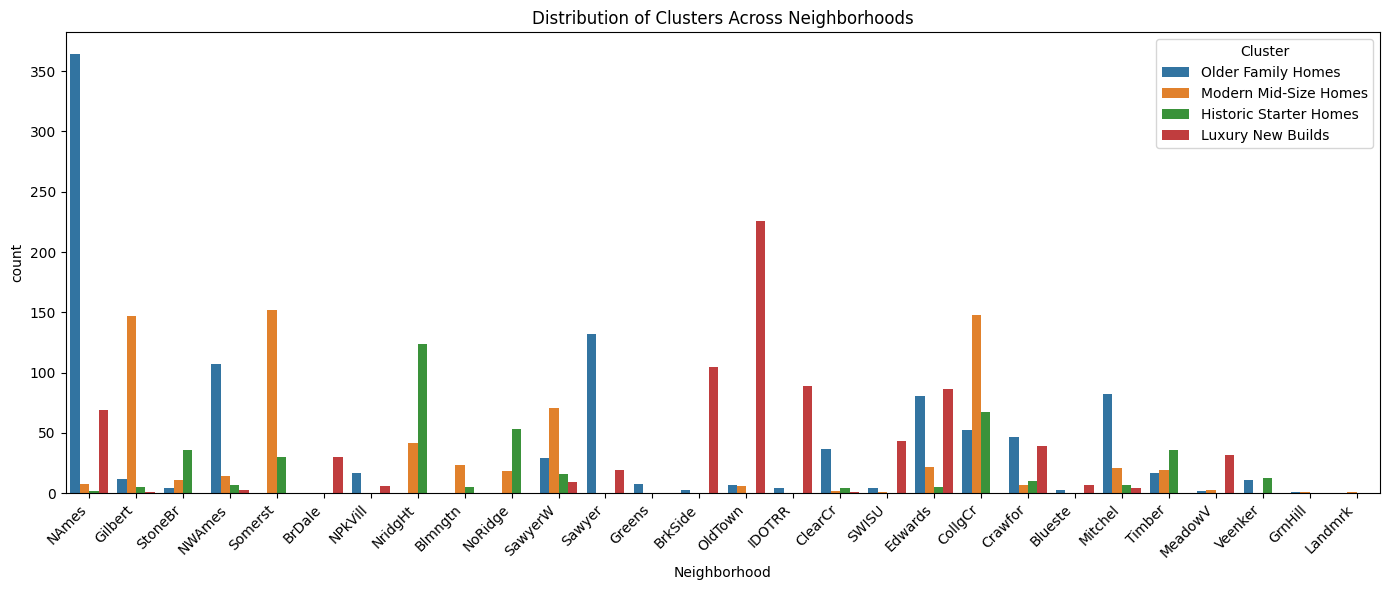

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_clustered, x='Neighborhood', hue='Cluster_Label', palette='tab10')
plt.title("Distribution of Clusters Across Neighborhoods")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

In [ ]:
# Align by index to avoid length mismatch
df_clustered['House Style'] = df_cleaned['House Style']

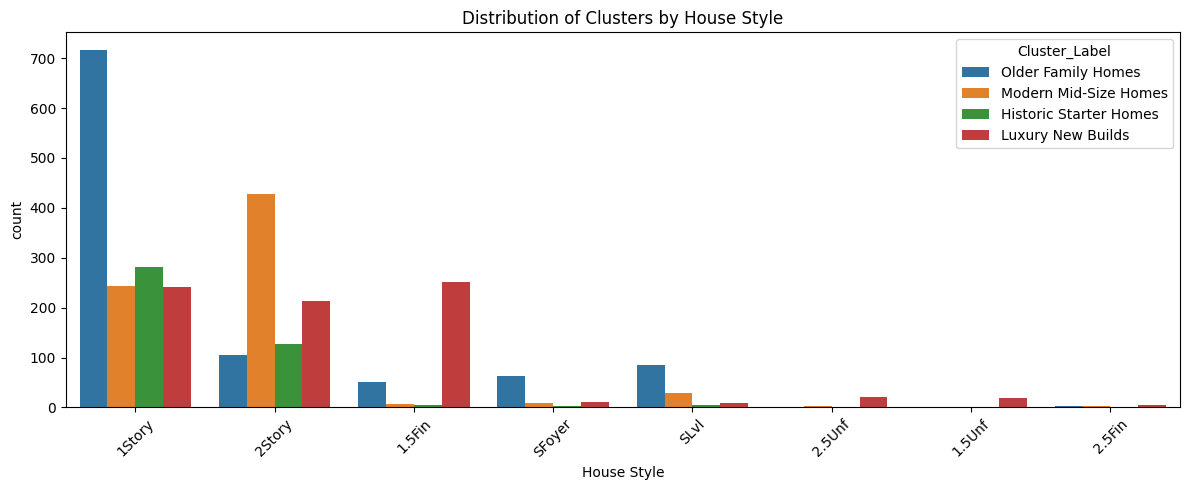

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df_clustered, x='House Style', hue='Cluster_Label', palette='tab10')
plt.title("Distribution of Clusters by House Style")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Merge the cluster column from df_clustered
df_encoded['Cluster'] = df_clustered['Cluster']

**Supervised Learning**

**Model Preparation**

In [ ]:
target = 'SalePrice'

Define Features and Target

In [ ]:
from sklearn.model_selection import train_test_split

# Drop target & non-predictive fields

X = df_encoded.drop(columns=['SalePrice'], errors='ignore')
y = df_encoded['SalePrice']

# Split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Linear Regression (Baseline)**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluate
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression → RMSE: {rmse_lr:.4f}, R²: {r2_lr:.4f}")


Linear Regression → RMSE: 30400.7550, R²: 0.8847


Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest → RMSE: {rmse_rf:.4f}, R²: {r2_rf:.4f}")

Random Forest → RMSE: 25495.6540, R²: 0.9189


XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost → RMSE: {rmse_xgb:.4f}, R²: {r2_xgb:.4f}")

XGBoost → RMSE: 23573.6490, R²: 0.9307


**Create a Comparison Table**

In [ ]:
# Example (replace these with your actual values if different)
rmse_lr, r2_lr     # from Linear Regression
rmse_rf, r2_rf     # from Random Forest
rmse_xgb, r2_xgb   # from XGBoost

(np.float64(23573.64901749409), 0.930687427520752)

In [ ]:
import pandas as pd

# Create summary table
model_scores = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'RMSE': [rmse_lr, rmse_rf, rmse_xgb],
    'R2 Score': [r2_lr, r2_rf, r2_xgb]
})

**Plot the Comparison**

Plot RMSE Comparison

<ipython-input-52-12280679410d>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




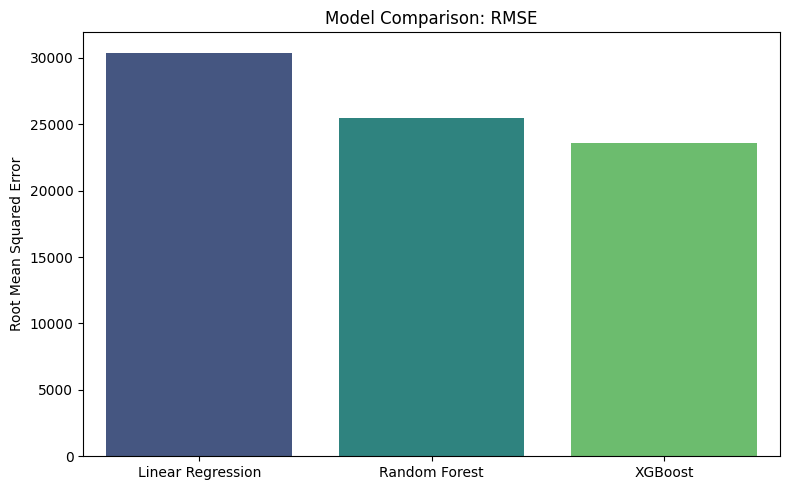

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=model_scores, x='Model', y='RMSE', palette='viridis')
plt.title('Model Comparison: RMSE')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('')
plt.tight_layout()
plt.show()

Plot R² Score Comparison

<ipython-input-53-491e18c186b3>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




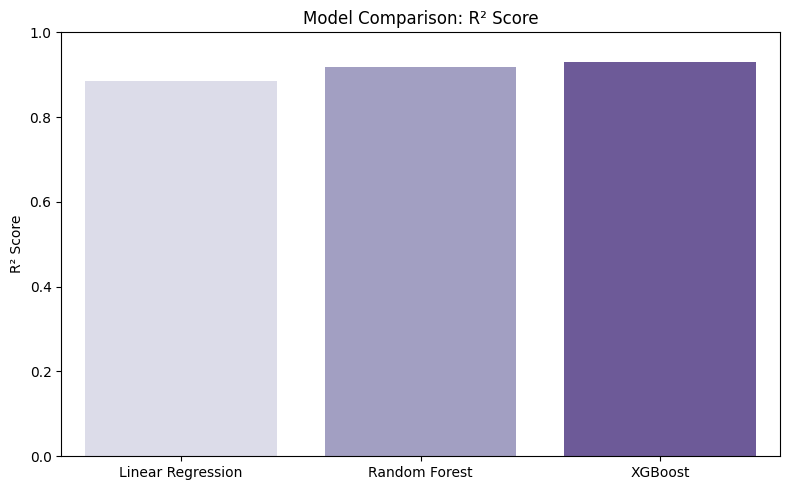

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=model_scores, x='Model', y='R2 Score', palette='Purples')
plt.title('Model Comparison: R² Score')
plt.ylabel('R² Score')
plt.xlabel('')
plt.ylim(0, 1)  # since R² is between 0 and 1
plt.tight_layout()
plt.show()

**Recommendation**

Plot Feature Importances from XGBoost

<Figure size 1000x800 with 0 Axes>

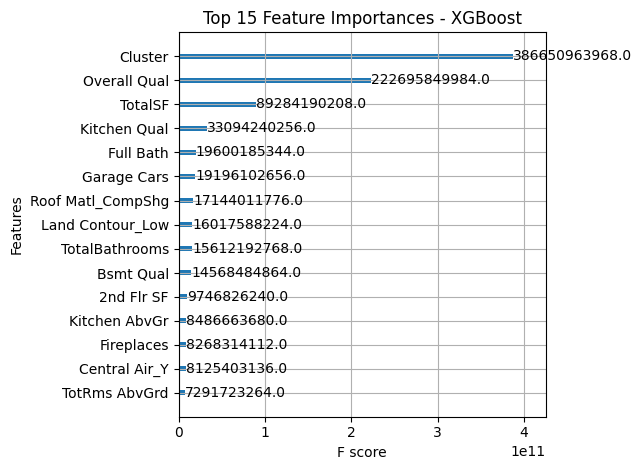

In [ ]:
from xgboost import plot_importance

# Use built-in importance plot
plt.figure(figsize=(10, 8))
plot_importance(xgb, max_num_features=15, importance_type='gain')  # 'gain' is usually most informative
plt.title("Top 15 Feature Importances - XGBoost")
plt.tight_layout()
plt.show()

Feature Importances from Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Already trained earlier:
# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)

Get Feature Importances

In [ ]:
import pandas as pd

# Extract feature importances
importances = rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Show top 15
print(feature_importance_df.head(15))

               Feature  Importance
3         Overall Qual    0.313579
207            TotalSF    0.271850
208            Cluster    0.203441
23         Gr Liv Area    0.019981
21          2nd Flr SF    0.018979
30        Kitchen Qual    0.012890
2             Lot Area    0.011038
36         Garage Area    0.008363
14        BsmtFin SF 1    0.007250
48            HouseAge    0.007215
10           Bsmt Qual    0.007187
17         Bsmt Unf SF    0.006943
206     TotalBathrooms    0.006822
49   YearsSinceRemodel    0.005375
18       Total Bsmt SF    0.004738


Plot Top Features

<ipython-input-57-3b432e8cfc05>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




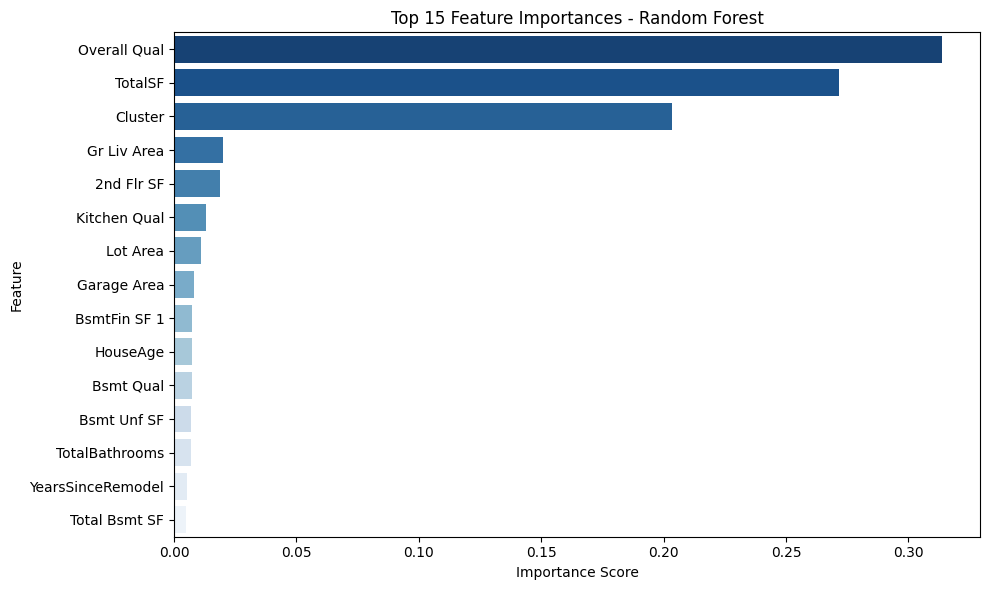

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df.head(15), x='Importance', y='Feature', palette='Blues_r')
plt.title('Top 15 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

**Feature Importances in XGBoost**

In [ ]:
from xgboost import XGBRegressor

**Built-in XGBoost Plot (Top 15 Features by Gain)**

<Figure size 1000x800 with 0 Axes>

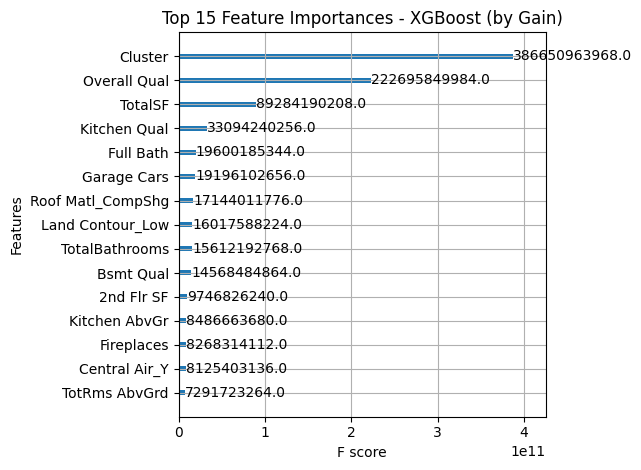

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plot_importance(xgb, max_num_features=15, importance_type='gain')
plt.title("Top 15 Feature Importances - XGBoost (by Gain)")
plt.tight_layout()
plt.show()

Create DataFrame of Importances (if you want tabular output)

In [ ]:
import pandas as pd

# Get raw feature importances
importance_dict = xgb.get_booster().get_score(importance_type='gain')

# Convert to DataFrame
xgb_importance_df = pd.DataFrame({
    'Feature': list(importance_dict.keys()),
    'Gain': list(importance_dict.values())
}).sort_values(by='Gain', ascending=False)

# Display top 15
print(xgb_importance_df.head(15))

               Feature          Gain
131            Cluster  3.866510e+11
3         Overall Qual  2.226958e+11
130            TotalSF  8.928419e+10
30        Kitchen Qual  3.309424e+10
26           Full Bath  1.960019e+10
35         Garage Cars  1.919610e+10
93   Roof Matl_CompShg  1.714401e+10
59    Land Contour_Low  1.601759e+10
129     TotalBathrooms  1.561219e+10
10           Bsmt Qual  1.456848e+10
21          2nd Flr SF  9.746826e+09
29       Kitchen AbvGr  8.486664e+09
33          Fireplaces  8.268314e+09
112      Central Air_Y  8.125403e+09
31       TotRms AbvGrd  7.291723e+09


**Plot as a Custom Seaborn Bar Chart**

<ipython-input-61-da9c82adaa40>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




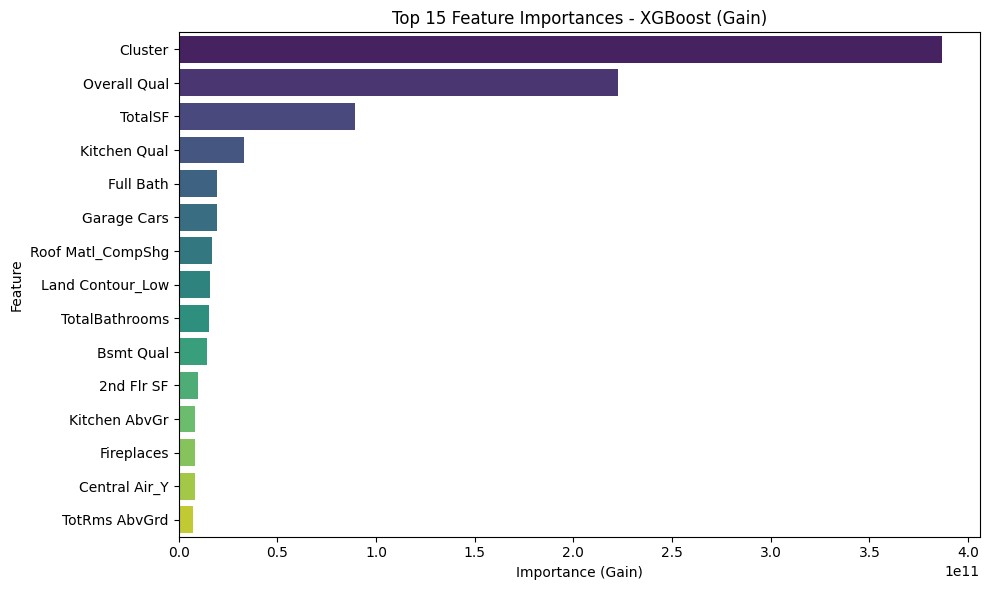

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=xgb_importance_df.head(15), x='Gain', y='Feature', palette='viridis')
plt.title('Top 15 Feature Importances - XGBoost (Gain)')
plt.xlabel('Importance (Gain)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()